# Project-2: Help Twitter Combat Hate Speech Using NLP and Machine Learining

DESCRIPTION

Using NLP and ML, make a model to identify hate speech (racist or sexist tweets) in Twitter.

Problem Statement:  

Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium  to spread hate. 

You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.

Domain: Social Media

Analysis to be done: Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

Content: 

id: identifier number of the tweet

Label: 0 (non-hate) /1 (hate)

Tweet: the text in the tweet

Tasks: 

1.Load the tweets file using read_csv function from Pandas package. 

2.Get the tweets into a list for easy text cleanup and manipulation.

3.To cleanup: 

1. Normalize the casing.

2. Using regular expressions, remove user handles. These begin with '@’.

3. Using regular expressions, remove URLs.

4. Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.

5. Remove stop words.

6. Remove redundant terms like ‘amp’, ‘rt’, etc.

7. Remove ‘#’ symbols from the tweet while retaining the term.

4.Extra cleanup by removing terms with a length of 1.

5.Check out the top terms in the tweets:

1. First, get all the tokenized terms into one large list.

2. Use the counter and find the 10 most common terms.

6.Data formatting for predictive modeling:

1. Join the tokens back to form strings. This will be required for the vectorizers.

2. Assign x and y.

3. Perform train_test_split using sklearn.

7.We’ll use TF-IDF values for the terms as a feature to get into a vector space model.

1. Import TF-IDF  vectorizer from sklearn.

2. Instantiate with a maximum of 5000 terms in your vocabulary.

3. Fit and apply on the train set.

4. Apply on the test set.

8.Model building: Ordinary Logistic Regression

1. Instantiate Logistic Regression from sklearn with default parameters.

2. Fit into  the train data.

3. Make predictions for the train and the test set.

9.Model evaluation: Accuracy, recall, and f_1 score.

1. Report the accuracy on the train set.

2. Report the recall on the train set: decent, high, or low.

3. Get the f1 score on the train set.

10.Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.

1. Adjust the appropriate class in the LogisticRegression model.

11.Train again with the adjustment and evaluate.

1. Train the model on the train set.

2. Evaluate the predictions on the train set: accuracy, recall, and f_1 score.

11.Regularization and Hyperparameter tuning:

1. Import GridSearch and StratifiedKFold because of class imbalance.

2. Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.

3. Use a balanced class weight while instantiating the logistic regression.

13.Find the parameters with the best recall in cross-validation.

1. Choose ‘recall’ as the metric for scoring.

2. Choose a stratified 4 fold cross-validation scheme.

3. Fit into  the train set.

14.What are the best parameters?

15.Predict and evaluate using the best estimator.

1. Use the best estimator from the grid search to make predictions on the test set.

2. What is the recall on the test set for the toxic comments?

3. What is the f_1 score?

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from nltk.tokenize import TweetTokenizer

In [ ]:
# Loading the data
data=pd.read_csv('T_h.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
# dropping id column
data.drop('id',axis=1,inplace=True)

In [ ]:
data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
# checking the count of non hate and hate speechs
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
# Removing stopwords and redundant words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#add additional stop words to be removed from the text
additional_list = ['amp','rt','u',"can't",'ur']

for words in additional_list:
    stop_words.append(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Text Cleaning** 

In [ ]:
def process_message(review_text):
    # remove all the special characters
    new_review_text = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "",review_text) 
    # convert all letters to lower case
    words = new_review_text.lower().split()
    # remove stop words
    words = [w for w in words if not w in stop_words]    
    # lemmatizer
    words = [lemmatizer.lemmatize(word) for word in words]
    # join all words back to text
    return (" ".join(words))

In [ ]:
data['clean_tweet']=data['tweet'].apply(lambda x: process_message(x))

In [ ]:
data.head()

,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model love take time
4,0,factsguide: society now #motivation,factsguide society motivation


In [ ]:
from wordcloud import WordCloud,STOPWORDS
def createWrdCloudForSentiment(sentiment):
    sentiment_num = 1 if sentiment== 'Hate' else 0
    temp_df = data[data.label==sentiment_num]
    words = " ".join(temp_df.clean_tweet)
    cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT'])

    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1500,
                      height=1000).generate(cleaned_words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

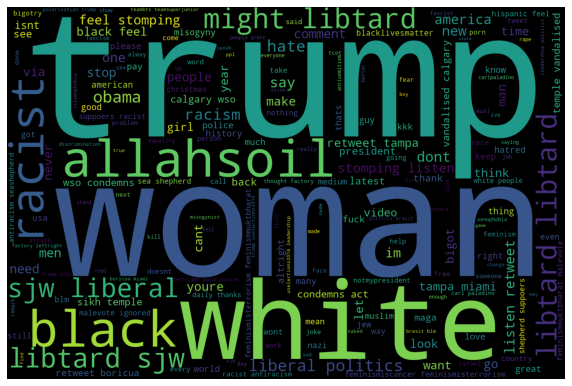

In [ ]:
createWrdCloudForSentiment('Hate')

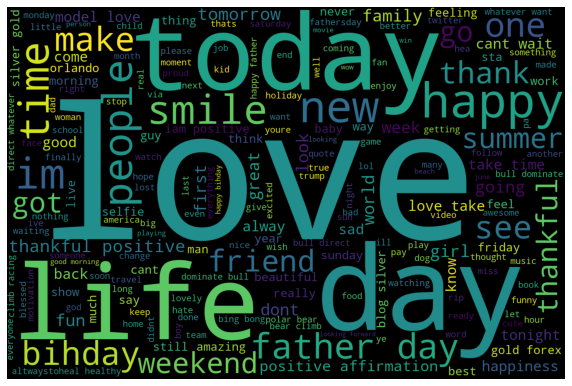

In [ ]:
createWrdCloudForSentiment('positive')

In [ ]:
# Tokenizing the tweets
tokenizer = TweetTokenizer(preserve_case=True)
data['clean_tweet'] = data['clean_tweet'].apply(tokenizer.tokenize)

In [ ]:
# Finding 10 most common terms using counter
from collections import Counter
results=Counter()
data['clean_tweet'].apply(results.update)
print(results.most_common(10))

[('love', 2776), ('day', 2770), ('happy', 1691), ('time', 1235), ('life', 1235), ('im', 1157), ('like', 1138), ('today', 1085), ('get', 1001), ('new', 987)]


**Data formatting for Predictive modeling**

In [ ]:
# joining the tokens back to form string
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join(x))


In [ ]:
data.drop('tweet',axis=1,inplace=True)

In [ ]:
data.head()

,label,clean_tweet
0,0,father dysfunctional selfish drag kid dysfunct...
1,0,thanks lyft credit cant use cause dont offer w...
2,0,bihday majesty
3,0,model love take time
4,0,factsguide society motivation


In [ ]:
# Assigning x and y
x=data['clean_tweet']
y=data['label']

In [ ]:
# Performing train_test_split using scikit-learn
from sklearn.model_selection import train_test_split
seed = 23
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=seed,stratify=data['label'])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(25569,) (6393,) (25569,) (6393,)


**Tfidf**

In [ ]:
# Importing and Instantiating TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

In [ ]:
x_train=vectorizer.fit_transform(X_train)
x_test=vectorizer.transform(X_test)

In [ ]:
x_train.shape ,x_test.shape

((25569, 5000), (6393, 5000))

**Model Building**

In [ ]:
# importing LogisticRegression with Default Parameters
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)

**Model Evaluation**

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

0.9563925065509015
0.9515094634756766


In [ ]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23775
           1       0.95      0.40      0.56      1794

    accuracy                           0.96     25569
   macro avg       0.95      0.70      0.77     25569
weighted avg       0.96      0.96      0.95     25569



In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5945
           1       0.91      0.34      0.50       448

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393



The models recall and f1 score are low for label 1 which indicates hate speech in twitter



In [ ]:
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

**Training with Adjustments**

The minority to majority class ratio is 1:13

In [ ]:
# defining weights of class labels
weights={0:1.0,1:13.0}

In [ ]:
lr=LogisticRegression(solver='lbfgs',class_weight=weights)
lr.fit(x_train,y_train)

LogisticRegression(class_weight={0: 1.0, 1: 13.0})

In [ ]:
# Prediction on train set
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)

In [ ]:
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

0.9538503656771872
0.9263256687001408


In [ ]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     23775
           1       0.61      0.98      0.75      1794

    accuracy                           0.95     25569
   macro avg       0.80      0.96      0.86     25569
weighted avg       0.97      0.95      0.96     25569



In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5945
           1       0.48      0.79      0.60       448

    accuracy                           0.93      6393
   macro avg       0.73      0.86      0.78      6393
weighted avg       0.95      0.93      0.93      6393



The f1-score and recall for both Training and test set has improved compared to the previous logisticRegression model and there are many other ways to improve the metrics

**Regularization and Hyperparameter tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold

In [ ]:
# define parameter grid
from scipy.stats import loguniform
params = dict()
params['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
params['penalty'] = ['l1', 'l2','elasticnet']
params['C'] = loguniform(1e-5, 100)

In [ ]:
print(params)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f075fbbb290>}


In [ ]:
# Instantiating LogisticRegression with balanced class weights
weights = {0:1.0,1:1.0}
lr = LogisticRegression(class_weight=weights)
#define the number of folds 
folds = StratifiedKFold(n_splits=4,random_state=seed,shuffle=True)
# define search
grid_search = RandomizedSearchCV(estimator=lr,param_distributions=params, n_iter=100, scoring='recall',
                            n_jobs=-1, cv=folds, random_state=seed)
#fit grid search on the train data
grid_result = grid_search.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
236 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

In [ ]:
# Retrieve best model
grid_result.best_estimator_

LogisticRegression(C=72.0563258945995, class_weight={0: 1.0, 1: 1.0},
                   penalty='l1', solver='liblinear')

In [ ]:
#instantiate the best model
lr = LogisticRegression(C=72.0563258945995,penalty='l1',solver='liblinear',class_weight=weights)


In [ ]:
# Train and Predict
lr.fit(x_train,y_train)
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

In [ ]:
print(classification_report(y_train,train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23775
           1       0.99      0.96      0.98      1794

    accuracy                           1.00     25569
   macro avg       0.99      0.98      0.99     25569
weighted avg       1.00      1.00      1.00     25569



In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5945
           1       0.57      0.63      0.60       448

    accuracy                           0.94      6393
   macro avg       0.77      0.80      0.78      6393
weighted avg       0.94      0.94      0.94      6393



In [ ]:
# Instantiating LogisticRegression with class weights proportional to the class imbalance
weights = {0:1.0,1:13.0}
lr = LogisticRegression(class_weight=weights)
#define the number of folds 
folds = StratifiedKFold(n_splits=4,random_state=seed,shuffle=True)
# define search
grid_search = RandomizedSearchCV(estimator=lr,param_distributions=params, n_iter=100, scoring='recall',
                            n_jobs=-1, cv=folds, random_state=seed)
#fit grid search on the train data
grid_result = grid_search.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
236 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

In [ ]:
# Retrieve best model
grid_result.best_estimator_

LogisticRegression(C=0.3407727957500573, class_weight={0: 1.0, 1: 13.0})

In [ ]:
#instantiate the best model
lr = LogisticRegression(C=0.3407727957500573,class_weight=weights)

In [ ]:
lr.fit(x_train,y_train)
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)

**Evaluate using the best model**

In [ ]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     23775
           1       0.56      0.95      0.71      1794

    accuracy                           0.94     25569
   macro avg       0.78      0.95      0.84     25569
weighted avg       0.97      0.94      0.95     25569



In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5945
           1       0.48      0.79      0.59       448

    accuracy                           0.92      6393
   macro avg       0.73      0.86      0.78      6393
weighted avg       0.95      0.92      0.93      6393



**Plot Confusion matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


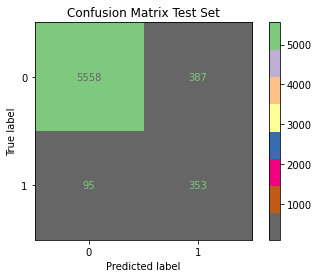

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr,x_test,y_test,cmap='Accent_r')
plt.title('Confusion Matrix Test Set')
plt.show()

## **Conclusion**

• Logistic regression with default parameters with Recall = 0.34 and F1-Score = 0.50

• Logistic regression with weights proportional to class imbalance Recall = 0.78 and F1-Score = 0.59

• Logistic regression fine tuned with grid_search and balanced class weights Recall = 0.63 and F1-Score = 0.60

• Logistic regression fine tuned with grid_search and class weights proportional to class imbalance Recall = 0.63 and F1-Score = 0.60